In [5]:
import numpy as np
from TDD.TDD2 import Ini_TDD,Clear_TDD,set_index_order,get_tdd,to_cnf2
from TDD.TDD_Q2 import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD.TDD_Q2 import reshape as reshape2
from TDD.TN2 import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
from sympy import *
from sympy.parsing.sympy_parser import parse_expr

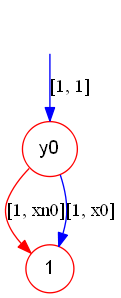

In [6]:
Ini_TDD(['x0','y0','x1','y1'])
A=['x0','y0','x1','y1','xn0']
[x0,y0,x1,y1,xn0]=symbols(A)
U=np.array([xn0,x0])
var=[Index('y0')]
ts1=Tensor(U,var)
ts1.tdd().show()

# ts2=Tensor(U,var)

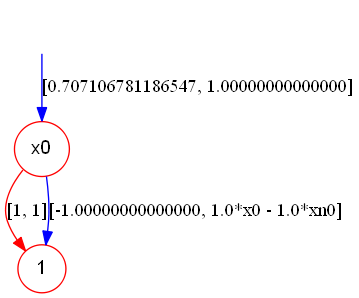

In [7]:
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var2=[Index('x0'),Index('y0')]
ts2=Tensor(H,var2)
# ts2.tdd().show()
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
# tdd.weight=[1/np.sqrt(2)]
tdd.show()
# Clear_TDD()

5


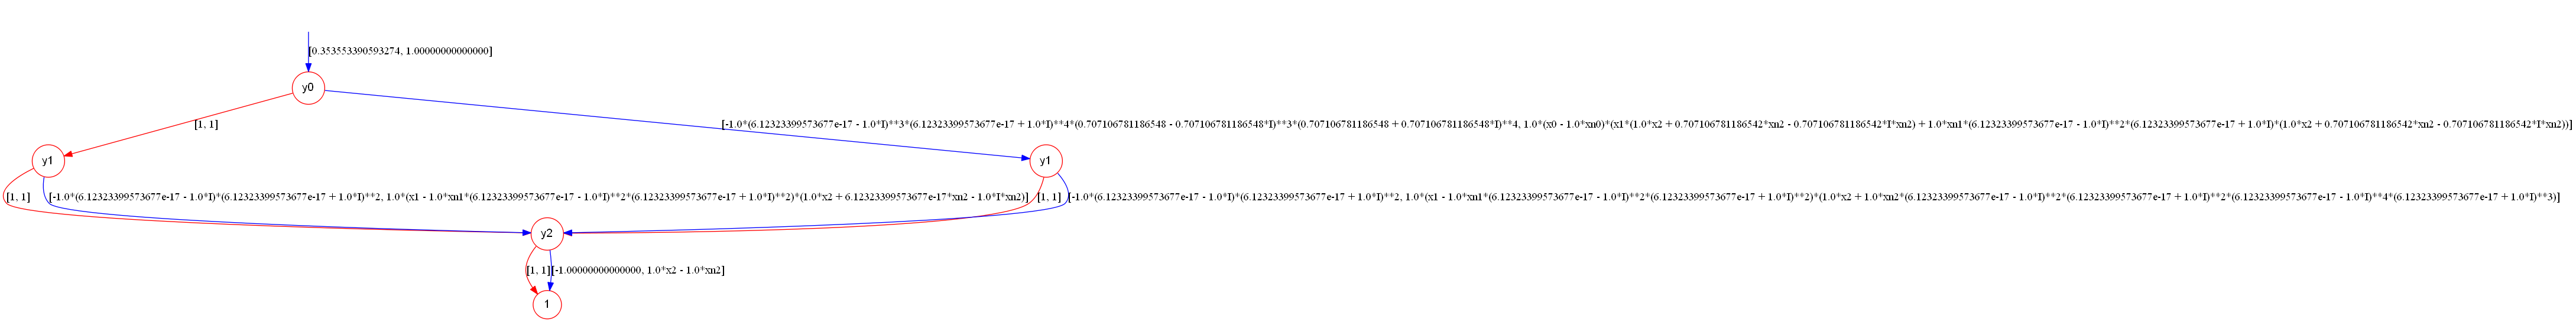

In [8]:
path='Benchmarks/'
n=3
file_name='qft_'+str(n)+'.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
for k in range(n):
    x_k='x'+str(k)
    xn_k='xn'+str(k)
    s=Symbol(x_k)
    ns=Symbol(xn_k)
    U=np.array([ns,s])
#     U=np.array([1,0])
    temp_ts=Tensor(U,[Index(x_k)])
    tn.tensors.insert(0,temp_ts)
Ini_TDD(indices)
tdd=tn.cont()
print(tdd.node_number())
tdd.show()

[[[[1 0]
   [0 1]]

  [[0 0]
   [0 0]]]


 [[[0 0]
   [0 0]]

  [[xn0 x0]
   [x0 xn0]]]]
10


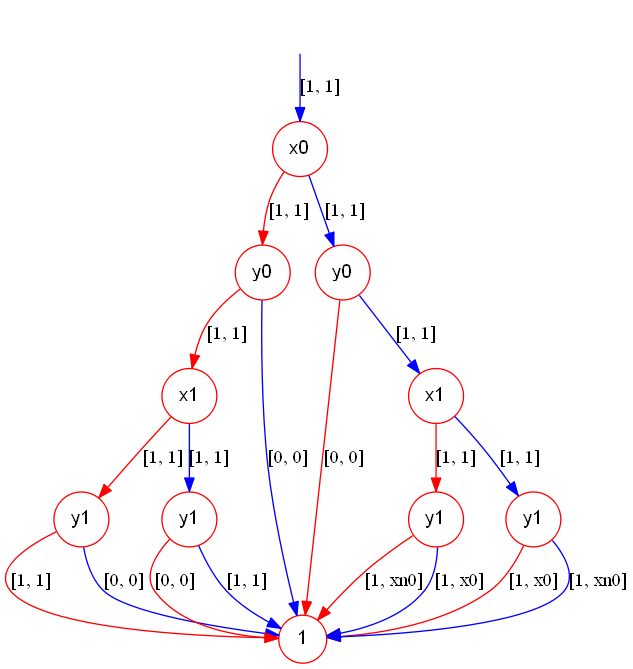

In [28]:
Ini_TDD(['x0','y0','x1','y1'])
x=symbols('x0')
nx=symbols('xn0')
U=np.array([[1,0,0,0],[0,1,0,0],[0,0,nx,x],[0,0,x,nx]])
# U=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
U=reshape2(U)
print(U)
var=[Index('x0'),Index('y0'),Index('x1'),Index('y1')]
ts1=Tensor(U,var)
tdd=ts1.tdd()
print(tdd.node_number())
tdd.show()

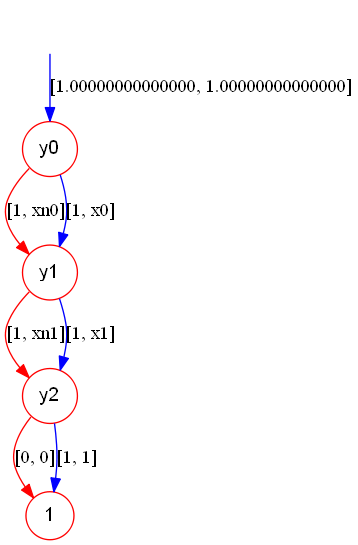

In [29]:
def veri_bv(n):

    syms=[]
    for k in range(n):
        syms.append(symbols('x'+str(k)))
        syms.append(symbols('xn'+str(k)))
        
    tn=TensorNetwork([])
    U=np.array([1,0])
    for k in range(n):
        var=[Index('x'+str(k))]
        ts=Tensor(U,var)
        tn.tensors.append(ts)
        
    U=np.array([0,1])
    var=[Index('x'+str(n))]
    ts=Tensor(U,var)
    tn.tensors.append(ts)
    
    H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
    for k in range(n+1):
        var=[Index('x'+str(k)),Index('x'+str(k)+'_1')]
        ts=Tensor(H,var)
        tn.tensors.append(ts)
    
    for k in range(n):
        U=np.array([[1,0,0,0],[0,1,0,0],[0,0,syms[2*k+1],syms[2*k]],[0,0,syms[2*k],syms[2*k+1]]])
        U=reshape2(U)
        var=[Index('x'+str(k)+'_1'),Index('x'+str(k)+'_2'),Index('x'+str(n)+'_'+str(k+1)),Index('x'+str(n)+'_'+str(k+2))]
        ts=Tensor(U,var)
        tn.tensors.append(ts)
    for k in range(n):
        var=[Index('x'+str(k)+'_2'),Index('y'+str(k))]
        ts=Tensor(H,var)
        tn.tensors.append(ts)

    var=[Index('x'+str(n)+'_'+str(n+1)),Index('y'+str(n))]
    ts=Tensor(H,var)
    tn.tensors.append(ts)
    
    var=[]
    for k in range(n):
        var.append('x'+str(k))
        var.append('x'+str(k)+'_1')
        var.append('x'+str(k)+'_2')
        var.append('y'+str(k))
    var.append('x'+str(n))
    
    for k in range(n+1):
        var.append('x'+str(n)+'_'+str(k+1))
    var.append('y'+str(n))
    Ini_TDD(var)
    
    tdd=tn.cont()
    return tdd

tdd=veri_bv(2)
tdd.show()

In [42]:
def toffoli(n):
    """The matrix of C^n(X)"""
    T=np.eye(2**(n+1))
    T[2**(n+1)-2,2**(n+1)-2]=0
    T[2**(n+1)-1,2**(n+1)-1]=0
    T[2**(n+1)-2,2**(n+1)-1]=1
    T[2**(n+1)-1,2**(n+1)-2]=1
    return T

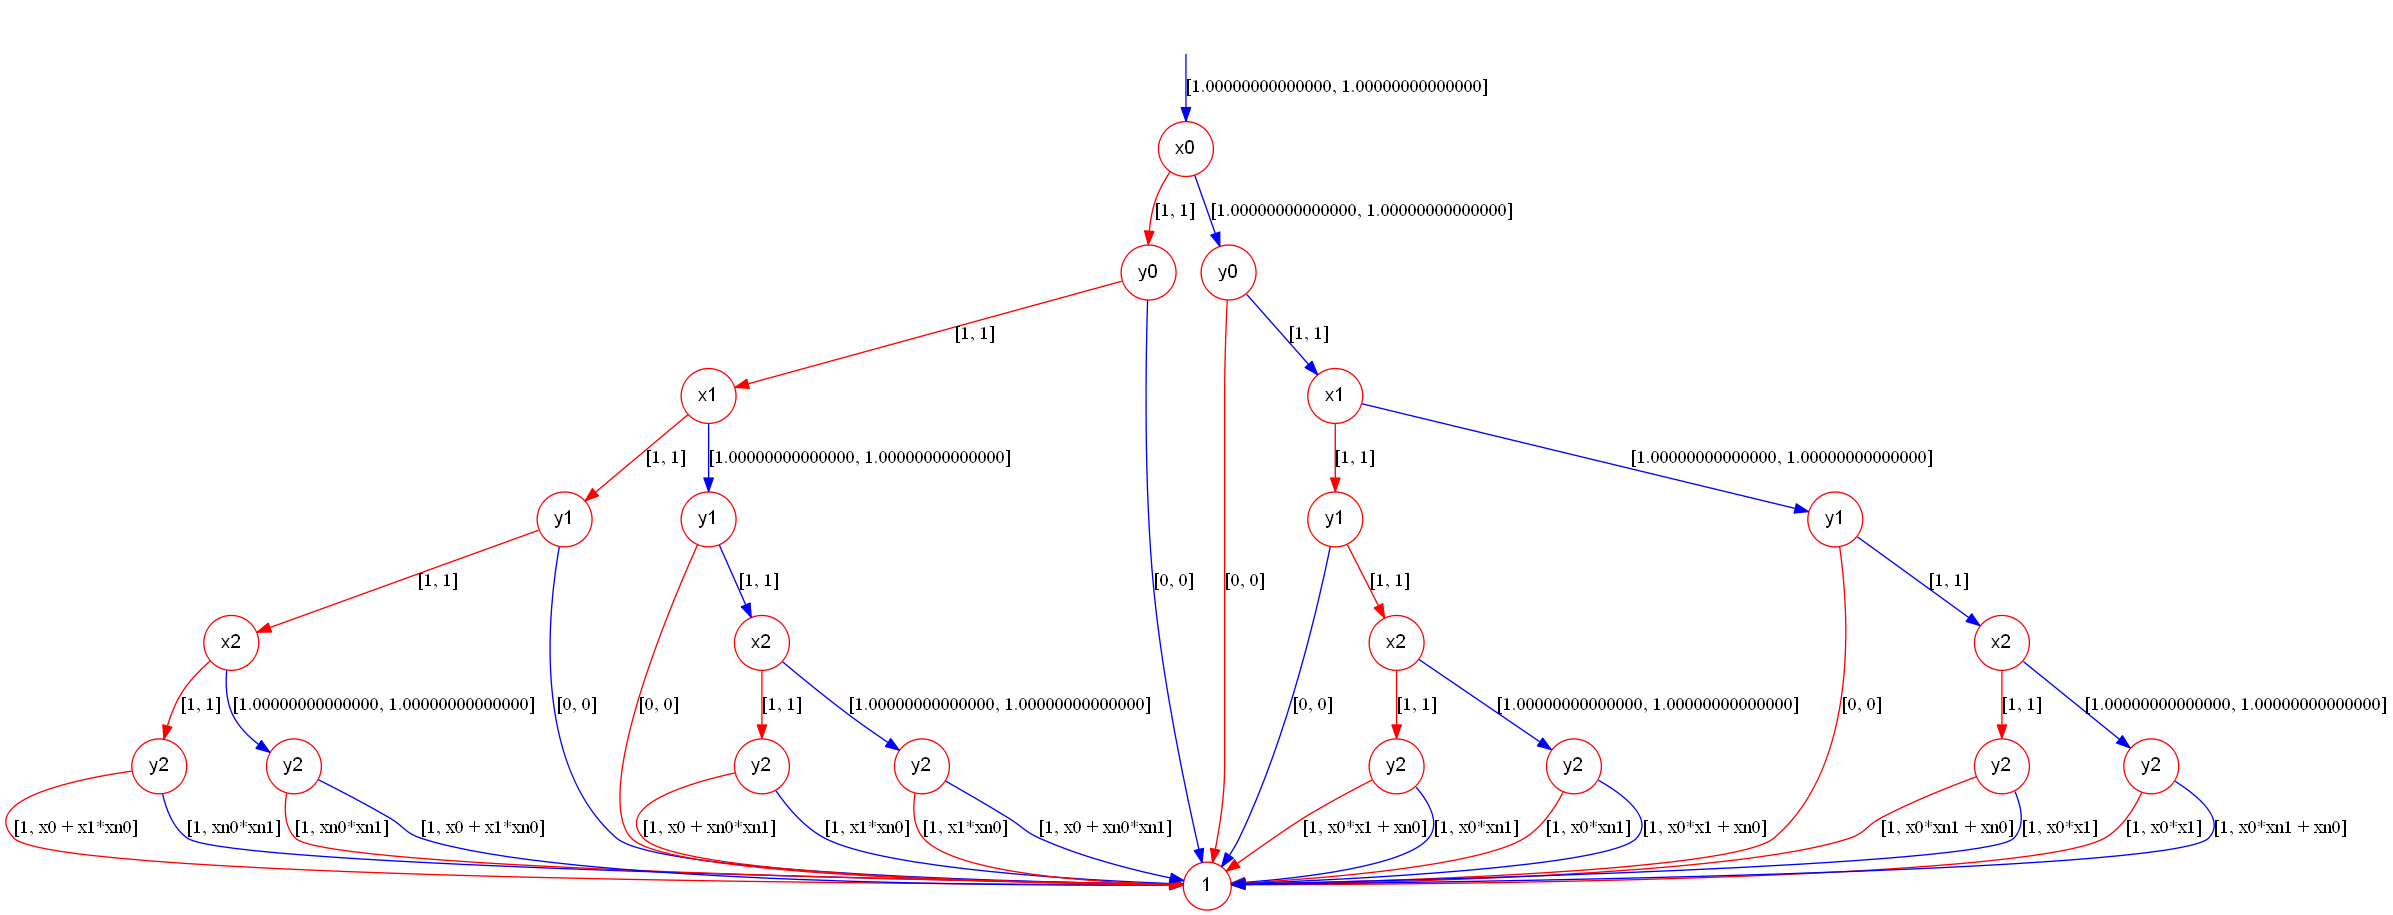

In [46]:
n=2
U=toffoli(n)
U=reshape2(U)
s0=symbols('x0')
s1=symbols('x1')
sn0=symbols('xn0')
sn1=symbols('xn1')
X0=np.array([[s0,sn0],[sn0,s0]])
X1=np.array([[s1,sn1],[sn1,s1]])

tn=TensorNetwork([])
var=[Index('x0'),Index('x0_1')]
ts=Tensor(X0,var)
tn.tensors.append(ts)
var=[Index('x1'),Index('x1_1')]
ts=Tensor(X1,var)
tn.tensors.append(ts)

var=[]
for k in range(n):
    var.append(Index('x'+str(k)+'_1'))
    var.append(Index('x'+str(k)+'_2'))
var.append(Index('x'+str(n)))
var.append(Index('y'+str(n)))
ts=Tensor(U,var)
tn.tensors.append(ts)

var=[Index('x0_2'),Index('y0')]
ts=Tensor(X0,var)
tn.tensors.append(ts)
var=[Index('x1_2'),Index('y1')]
ts=Tensor(X1,var)
tn.tensors.append(ts)


var=[]
for k in range(n+1):
    var.append('x'+str(k))
    var.append('x'+str(k)+'_1')
    var.append('x'+str(k)+'_2')
    var.append('y'+str(k))
    
Ini_TDD(var)
    
tdd=tn.cont()

tdd.show()